In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

student = pd.read_csv('stud_math.csv')

In [2]:
def yes_no_overview(column):
    '''The function displays the values and
    the number of non-zero elements for yes/no type of question'''
    display(pd.DataFrame(student[column].value_counts(dropna = False)))
    student.loc[:, [column]].info()
    
    
def sort_with_others(column):
    '''The function replaces empty values with \'other\'
    and shows the values and the number of non-zero elementsS'''
    student[column] = student[column].apply(lambda x: 'other' if pd.isnull(x) else x)
    display(pd.DataFrame(student[column].value_counts(dropna = False)))
    student.loc[:, [column]].info()

In [3]:
def numerical_sort_1(column):
    '''The function displays different statistical data
    about a given column. It is used for columns with values ranging from 
    0 to 4.'''
    
    '''General stats and histogram'''
    display(student[column].describe())
    
    '''25th,75th percentiles and the median,
    IQR and statistical boundaries calculated'''
    per25 = student[column].quantile(0.25)
    per75 = student[column].quantile(0.75)
    IQR = per75 - per25
    upper_boundary = per75 + 1.5*IQR
    lower_boundary = per25 - 1.5*IQR

    '''Displays the stats above'''
    print(
    '25th percentile: {}'.format(per25),
    '75th percentile: {}'.format(per75),
    'IQR: {}'.format(IQR),
    'Statistical boudaries:[{a},{b}]'.format(a = lower_boundary, b = upper_boundary)
    )
    

    '''Creates a hist type graph for all values inside the
    boundries'''
    student[column].loc[student[column].between(
        lower_boundary, upper_boundary
    )
                   ].hist(bins = 5, range = (0, 4), label = 'IQR')

    '''Creates a hist type graph of all values that fit inside the given range'''
    student[column].loc[student[column].between(0,4)
                   ].hist(bins = 5, alpha = 0.5, range = (0, 4), label = 'Statistical outliers')
    plt.legend();
    display(pd.DataFrame(student[column].value_counts(dropna = False)))
    student.loc[:, [column]].info()

In [4]:
'''The two functions could be combined into one by adding extra
variables for minimum and maximum boundary and the value for bins,
but I\'ve decided to keep them separated'''
def numerical_sort_2(column):
    '''The function displays different statistical data
    about a given column. It is used for columns with values ranging from 
    1 to 5.'''
    
    '''General stats and histogram'''
    display(student[column].describe())
    
    '''25th,75th percentiles and the median,
    IQR and statistical boundaries calculated'''
    per25 = student[column].quantile(0.25)
    per75 = student[column].quantile(0.75)
    IQR = per75 - per25
    upper_boundary = per75 + 1.5*IQR
    lower_boundary = per25 - 1.5*IQR

    '''Displays the stats above'''
    print(
    '25th percentile: {}'.format(per25),
    '75th percentile: {}'.format(per75),
    'IQR: {}'.format(IQR),
    'Statistical boudaries:[{a},{b}]'.format(a = lower_boundary, b = upper_boundary)
    )

    '''Creates a hist type graph for all values inside the
    boundries'''
    student[column].loc[student[column].between(
        lower_boundary, upper_boundary
    )
                   ].hist(bins = 6,range = (1, 5), label = 'IQR')

    '''Creates a hist type graph of all values that fit inside the given range'''
    student[column].loc[student[column].between(0, 5)
                   ].hist(bins = 6,alpha = 0.5, range = (1, 5), label = 'Statistical outliers')
    plt.legend();
    display(pd.DataFrame(student[column].value_counts(dropna = False)))
    student.loc[:, [column]].info()

In [5]:
display(student.head(10)) #quick overlook at the dataset
student.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
'''renaming the columns to make them easier to read and call in the future'''
student.columns = ['school', 'sex', 'age', 'address',
                  'family_size', 'parental_status', 'mother_education',
                  'father_education', 'mother_job', 'father_job',
                  'reason', 'guardian', 'travel_time', 'independent_study',
                  'external_fails', 'educational_support', 'family_education_support',
                  'tutor', 'extracurricular_activities', 'nursery',
                  'independent_studytime', 'pursues_higher_education',
                  'internet_access', 'in_relationship', 'family_relationship',
                  'free_time', 'social_activities', 'health', 'absences','score']

Certain columns have a numerical value to represent certain information. 
If the scale is 0 to 4, the information related to each number is given
in a respective section of the code.
Columns with such scale: mother_education, father_education, travel_time,
independent_study.
If the scale is 1 to 5, 1 represents the "very bad" option and 5 represents
"very good".
Columns with such scale: family_relationship, free_time, social_activities,
health.


In [7]:
'''Displays the number of NaN values in every column'''
pd.DataFrame(student.isna().sum(), columns = ['NaN values'])

,NaN values
school,0
sex,0
age,0
address,17
family_size,27
parental_status,45
mother_education,3
father_education,24
mother_job,19
father_job,36


In [8]:
'''Shows the number of NaN values for yes/no type of
questions'''
for column in ['educational_support', 'family_education_support',
               'tutor', 'extracurricular_activities', 'nursery',
               'pursues_higher_education', 'internet_access',
               'in_relationship']:
    yes_no_overview(column)

,educational_support
no,335
yes,51
NaN,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   educational_support  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,family_education_support
yes,219
no,137
NaN,39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   family_education_support  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,tutor
no,200
yes,155
NaN,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tutor   355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,extracurricular_activities
yes,195
no,186
NaN,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   extracurricular_activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,nursery
yes,300
no,79
NaN,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,pursues_higher_education
yes,356
NaN,20
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   pursues_higher_education  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,internet_access
yes,305
no,56
NaN,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   internet_access  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,in_relationship
no,240
yes,124
NaN,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   in_relationship  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [9]:
'''Replaces empty values with \'Other\', shows
the table of values for the columns in the list'''
for column in ['mother_job', 'father_job', 'reason', 'guardian']:
    sort_with_others(column)

,mother_job
other,152
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mother_job  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,father_job
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   father_job  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,reason
course,137
home,104
reputation,103
other,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,guardian
mother,250
father,86
other,59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# School analysis

In [10]:
'''Calling for a value_counts to see if there are any null values'''
display(pd.DataFrame(student.school.value_counts(dropna = False)))
student.loc[:, ['school']].info()

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# Sex analysis

In [11]:
'''Calling down a value_counts to see any empty values'''
display(pd.DataFrame(student.sex.value_counts(dropna = False)))
student.loc[:, ['sex']].info()

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [12]:
'''Replacing F with Female and M with Male for more clarity'''
student.sex = student.sex.apply(lambda x: 
                                'Female' if x in 'F' else 'Male')

# Age analysis

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

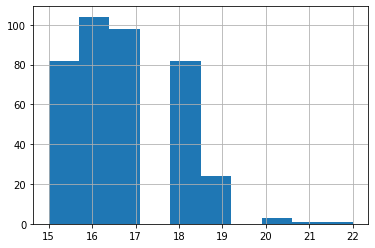

In [13]:
student.age.hist()
student.age.describe()

25th percentile: 16.0 75th percentile: 18.0 IQR: 2.0 Statistical boudaries:[13.0,21.0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


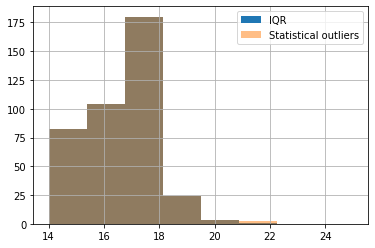

In [14]:
'''For the future, the statistical outliers will be determined
Otherwise, the age data has no outliers as it is given that all
students are of age from 15 to 22. Brown part represents
the values that are not statistical outliers, and the only
value represented by pale orange is the only statistical outlier
in the age values.'''

per25 = student.age.quantile(0.25)
per75 = student.age.quantile(0.75)
IQR = per75 - per25
upper_boundary = per75 + 1.5*IQR
lower_boundary = per25 - 1.5*IQR
                             
print(
'25th percentile: {}'.format(per25),
'75th percentile: {}'.format(per75),
'IQR: {}'.format(IQR),
'Statistical boudaries:[{a},{b}]'.format(a = lower_boundary, b = upper_boundary)
)

student.age.loc[student.age.between(
    lower_boundary, upper_boundary
)
               ].hist(bins = 8,range = (14, 25), label = 'IQR')

student.age.loc[student.age.between(15,22)
               ].hist(bins = 8,alpha = 0.5, range = (14, 25), label = 'Statistical outliers')
plt.legend();

student.loc[:, ['age']].info()

# Address analysis

In [15]:
'''Calling down a value_counts to see any empty values'''
display(pd.DataFrame(student.address.value_counts(dropna = False)))
student.loc[:, ['address']].info()

,address
U,295
R,83
NaN,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [16]:
'''replacing U with Urban and R with Rural for clarity'''
student.address = student.address.apply(lambda x:'Urban' if str(x) in 'U' else x)
student.address = student.address.apply(lambda x:'Rural' if str(x) in 'R' else x)

In [17]:
display(pd.DataFrame(student.address.value_counts(dropna = False)))
student.loc[:, ['address']].info()

,address
Urban,295
Rural,83
NaN,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# Family size analysis

In [18]:
'''Calling down a value_counts to see any empty values'''
pd.DataFrame(student.family_size.value_counts(dropna = False))

,family_size
GT3,261
LE3,107
NaN,27


In [19]:
'''Editing the values to increase clarity'''
student.family_size = student.family_size.apply(lambda x:'Greater than 3' if str(x) in 'GT3' else x)
student.family_size = student.family_size.apply(lambda x:'3 or less' if str(x) in 'LE3' else x)

In [20]:
display(pd.DataFrame(student.family_size.value_counts(dropna = False)))
student.loc[:, ['family_size']].info()

,family_size
Greater than 3,261
3 or less,107
NaN,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_size  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# Parental Status analysis

In [21]:
'''Calling down a value_counts to see any empty values'''
pd.DataFrame(student.parental_status.value_counts(dropna = False))

,parental_status
T,314
NaN,45
A,36


In [22]:
'''Editing the values to increase clarity'''
student.parental_status = student.parental_status.apply(lambda x:'Together' if str(x) in 'T' else x)
student.parental_status = student.parental_status.apply(lambda x:'Apart' if str(x) in 'A' else x)

In [23]:
display(pd.DataFrame(student.parental_status.value_counts(dropna = False)))
student.loc[:, ['parental_status']].info()

,parental_status
Together,314
NaN,45
Apart,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   parental_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# Analysis of Mother's education

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_education, dtype: float64

25th percentile: 2.0 75th percentile: 4.0 IQR: 2.0 Statistical boudaries:[-1.0,7.0]


,mother_education
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mother_education  392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


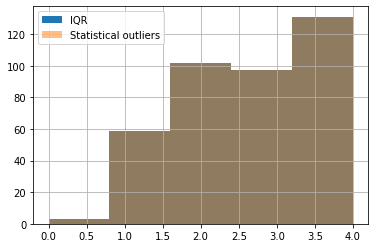

In [24]:
'''See the function description.
0 represents no education; 1 represents 1-4 years of school education,
2 represents 5 to 9 years of education,
3 represents an equivalent of 11 years of school education and
4 represents a degree or higher. Those values represent Russian
education system with no equivalent of A-levels or college.'''
numerical_sort_1('mother_education')

# Analysis of Father's education

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: father_education, dtype: float64

25th percentile: 2.0 75th percentile: 3.0 IQR: 1.0 Statistical boudaries:[0.5,4.5]


,father_education
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   father_education  371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


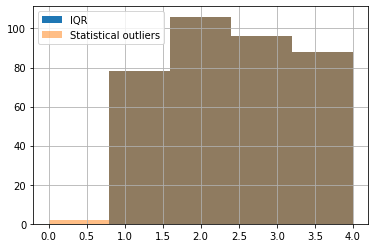

In [25]:
'''From the use of the function a clear outlier of
40 is found. It is assumed to be atypo of 4.0 and
edited accordingly.
0 represents no education; 1 represents 1-4 years of school education,
2 represents 5 to 9 years of education,
3 represents an equivalent of 11 years of school education and
4 represents a degree or higher. Those values represent Russian
education system with no equivalent of A-levels or college.'''
numerical_sort_1('father_education')
student['father_education'].loc[student['father_education'] == 40] = 4.0
student.loc[:, [column]].info()

# Travel Time analysis

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

25th percentile: 1.0 75th percentile: 2.0 IQR: 1.0 Statistical boudaries:[-0.5,3.5]


,travel_time
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


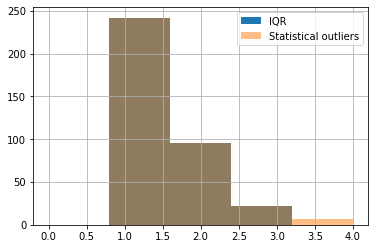

In [26]:
'''Function not applied to this value as there might a correlation between
this value and the address of a student.
0 represents less than 15 minutes of time spent on traveling to school,
1 represents 15 to 30 minutes, 2 represents 30 to 60 minutes,
and 4 represents 60 minutes or more.'''
numerical_sort_1('travel_time')

# Independant study analysis

In [27]:
'''Due to existance of exact time spent on study outside the class,
this column is redudant'''
student.drop(['independent_study'], inplace = True, axis = 1)

# External Fails analysis

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: external_fails, dtype: float64

25th percentile: 0.0 75th percentile: 0.0 IQR: 0.0 Statistical boudaries:[0.0,0.0]


,external_fails
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   external_fails  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


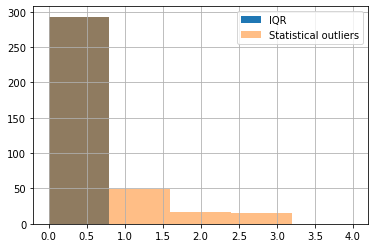

In [28]:
numerical_sort_1('external_fails')

# Independent Studytime

,independent_studytime
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: independent_studytime, dtype: float64

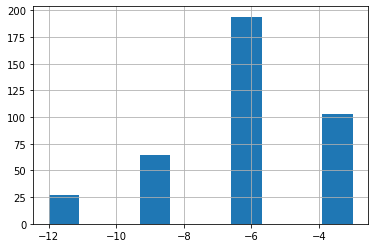

In [29]:
'''Displace the data from the column'''
display(pd.DataFrame(student.independent_studytime.value_counts(dropna = False)))
student.independent_studytime.hist()
student.independent_studytime.describe()

In [30]:
'''Removes the - from the values and changes them to float type'''
student.independent_studytime = student.independent_studytime.apply(lambda x: float(str(x).replace('-', '')))

count    388.000000
mean       6.115979
std        2.526235
min        3.000000
25%        3.000000
50%        6.000000
75%        6.000000
max       12.000000
Name: independent_studytime, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   independent_studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


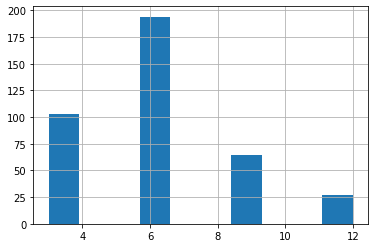

In [31]:
'''Shows the edited data from the column'''
student.independent_studytime.hist()
display(student.independent_studytime.describe())
student.loc[:, ['independent_studytime']].info()

# Family Relationship analysis

,family_relationship
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relationship, dtype: float64

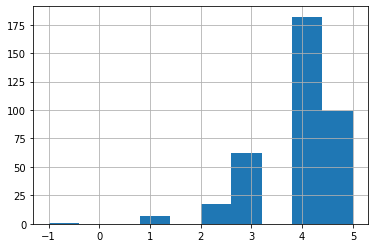

In [32]:
'''General overlook at the column, looking at the number of empty values'''
display(pd.DataFrame(student.family_relationship.value_counts(dropna = False)))
student.family_relationship.hist()
student.family_relationship.describe()

In [33]:
'''A clear outlier is seen at -1, assumed to be a typo
and replaced by 1'''
student['family_relationship'].loc[student['family_relationship'] < 0] = 1.0

25th percentile: 4.0 75th percentile: 5.0 IQR: 1.0 Statistical boudaries:[2.5,6.5]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   family_relationship  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


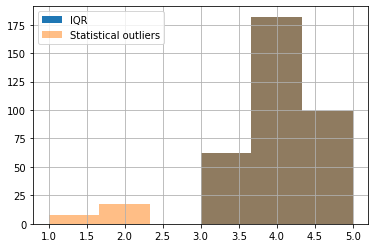

In [34]:
'''No imputation is done in this section due to median being too
high, which would be a bad representation in the context of the column'''
per25 = student.family_relationship.quantile(0.25)
per75 = student.family_relationship.quantile(0.75)
IQR = per75 - per25
upper_boundary = per75 + 1.5*IQR
lower_boundary = per25 - 1.5*IQR
                             
print(
'25th percentile: {}'.format(per25),
'75th percentile: {}'.format(per75),
'IQR: {}'.format(IQR),
'Statistical boudaries:[{a},{b}]'.format(a = lower_boundary, b = upper_boundary)
)

student.family_relationship.loc[student.family_relationship.between(
    lower_boundary, upper_boundary
)
               ].hist(bins = 6, range = (1, 5), label = 'IQR')

student.family_relationship.loc[student.family_relationship.between(0,5)
               ].hist(bins = 6, alpha = 0.5, range = (1, 5), label = 'Statistical outliers')
plt.legend();
student.loc[:, ['family_relationship']].info()

# Free time

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

25th percentile: 3.0 75th percentile: 4.0 IQR: 1.0 Statistical boudaries:[1.5,5.5]


,free_time
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


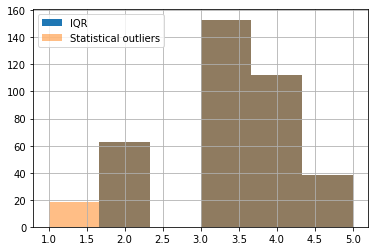

In [35]:
numerical_sort_2('free_time')

# Social activities

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: social_activities, dtype: float64

25th percentile: 2.0 75th percentile: 4.0 IQR: 2.0 Statistical boudaries:[-1.0,7.0]


,social_activities
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   social_activities  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


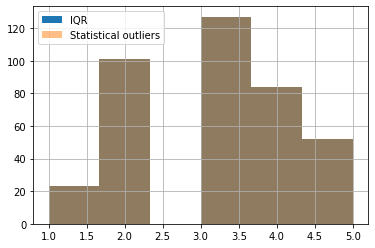

In [36]:
numerical_sort_2('social_activities')

# Health

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

25th percentile: 3.0 75th percentile: 5.0 IQR: 2.0 Statistical boudaries:[0.0,8.0]


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


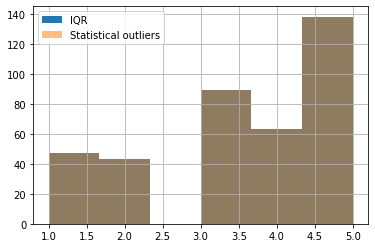

In [37]:
numerical_sort_2('health')

# absences

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

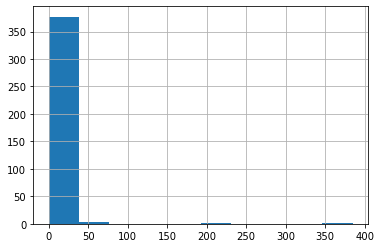

In [38]:
display(pd.DataFrame(student.absences.value_counts(dropna = False)))
student.absences.hist()
student.absences.describe()

25th percentile: 0.0 75th percentile: 8.0 IQR: 8.0 Statistical boudaries:[-12.0,20.0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  366 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


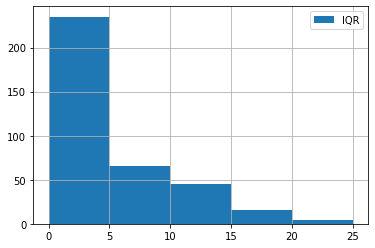

In [39]:
per25 = student.absences.quantile(0.25)
per75 = student.absences.quantile(0.75)
IQR = per75 - per25
upper_boundary = per75 + 1.5*IQR
lower_boundary = per25 - 1.5*IQR
                             
print(
'25th percentile: {}'.format(per25),
'75th percentile: {}'.format(per75),
'IQR: {}'.format(IQR),
'Statistical boudaries:[{a},{b}]'.format(a = lower_boundary, b = upper_boundary)
)
'''All statistical outliers are discarded after the meadian imputation'''
student = student.loc[(student.absences.between(lower_boundary, upper_boundary)
                      )|(student['absences'].isnull())]

student.absences.loc[student.absences.between(
    lower_boundary, upper_boundary
)
               ].hist(bins = 5, range = (0, 25), label = 'IQR')

plt.legend();
student.loc[:, ['absences']].info()

# score

,score
50.0,54
55.0,42
0.0,37
75.0,33
60.0,31
65.0,30
40.0,28
70.0,27
45.0,23
80.0,16


count    372.000000
mean      52.231183
std       23.072493
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

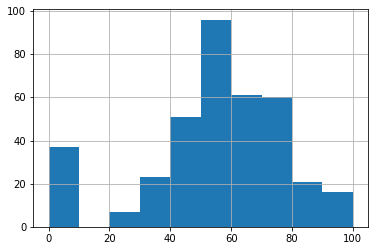

In [40]:
display(pd.DataFrame(student.score.value_counts(dropna = False)))
student.score.hist()
student.score.describe()

25th percentile: 40.0 75th percentile: 70.0 IQR: 30.0 Statistical boudaries:[-5.0,115.0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   372 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


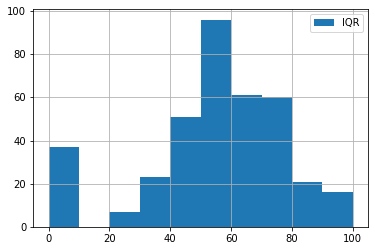

In [41]:
per25 = student.score.quantile(0.25)
per75 = student.score.quantile(0.75)
IQR = per75 - per25
upper_boundary = per75 + 1.5*IQR
lower_boundary = per25 - 1.5*IQR
                             
print(
'25th percentile: {}'.format(per25),
'75th percentile: {}'.format(per75),
'IQR: {}'.format(IQR),
'Statistical boudaries:[{a},{b}]'.format(a = lower_boundary, b = upper_boundary)
)

student.score.loc[student.score.between(
    lower_boundary, upper_boundary
)
               ].hist(bins = 10, range = (0, 100), label = 'IQR')

plt.legend();
student.loc[:, ['score']].info()

In [42]:
'''Discarding the empty values, as we are looking for
correlation with the student\'s score'''
student = student.loc[student.score.between(lower_boundary, upper_boundary)]

In [43]:
student.head()

,school,sex,age,address,family_size,parental_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,external_fails,educational_support,family_education_support,tutor,extracurricular_activities,nursery,independent_studytime,pursues_higher_education,internet_access,in_relationship,family_relationship,free_time,social_activities,health,absences,score
0,GP,Female,18,Urban,NaN,Apart,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,Female,17,Urban,Greater than 3,NaN,1.0,1.0,at_home,other,course,father,1.0,0.0,no,yes,no,no,no,6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,Female,15,Urban,3 or less,Together,1.0,1.0,at_home,other,other,mother,1.0,3.0,yes,no,NaN,no,yes,6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,Female,15,Urban,Greater than 3,Together,4.0,2.0,health,other,home,mother,1.0,0.0,no,yes,yes,yes,yes,9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,Female,16,Urban,Greater than 3,Together,3.0,3.0,other,other,home,father,1.0,0.0,no,yes,yes,no,yes,6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [44]:
'''Overall look at the number of empty values'''
display(pd.DataFrame(student.isna().sum(), columns = ['NaN values']))
student.info()

,NaN values
school,0
sex,0
age,0
address,15
family_size,25
parental_status,40
mother_education,3
father_education,23
mother_job,0
father_job,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school                      372 non-null    object 
 1   sex                         372 non-null    object 
 2   age                         372 non-null    int64  
 3   address                     357 non-null    object 
 4   family_size                 347 non-null    object 
 5   parental_status             332 non-null    object 
 6   mother_education            369 non-null    float64
 7   father_education            349 non-null    float64
 8   mother_job                  372 non-null    object 
 9   father_job                  372 non-null    object 
 10  reason                      372 non-null    object 
 11  guardian                    372 non-null    object 
 12  travel_time                 344 non-null    float64
 13  external_fails              353 non

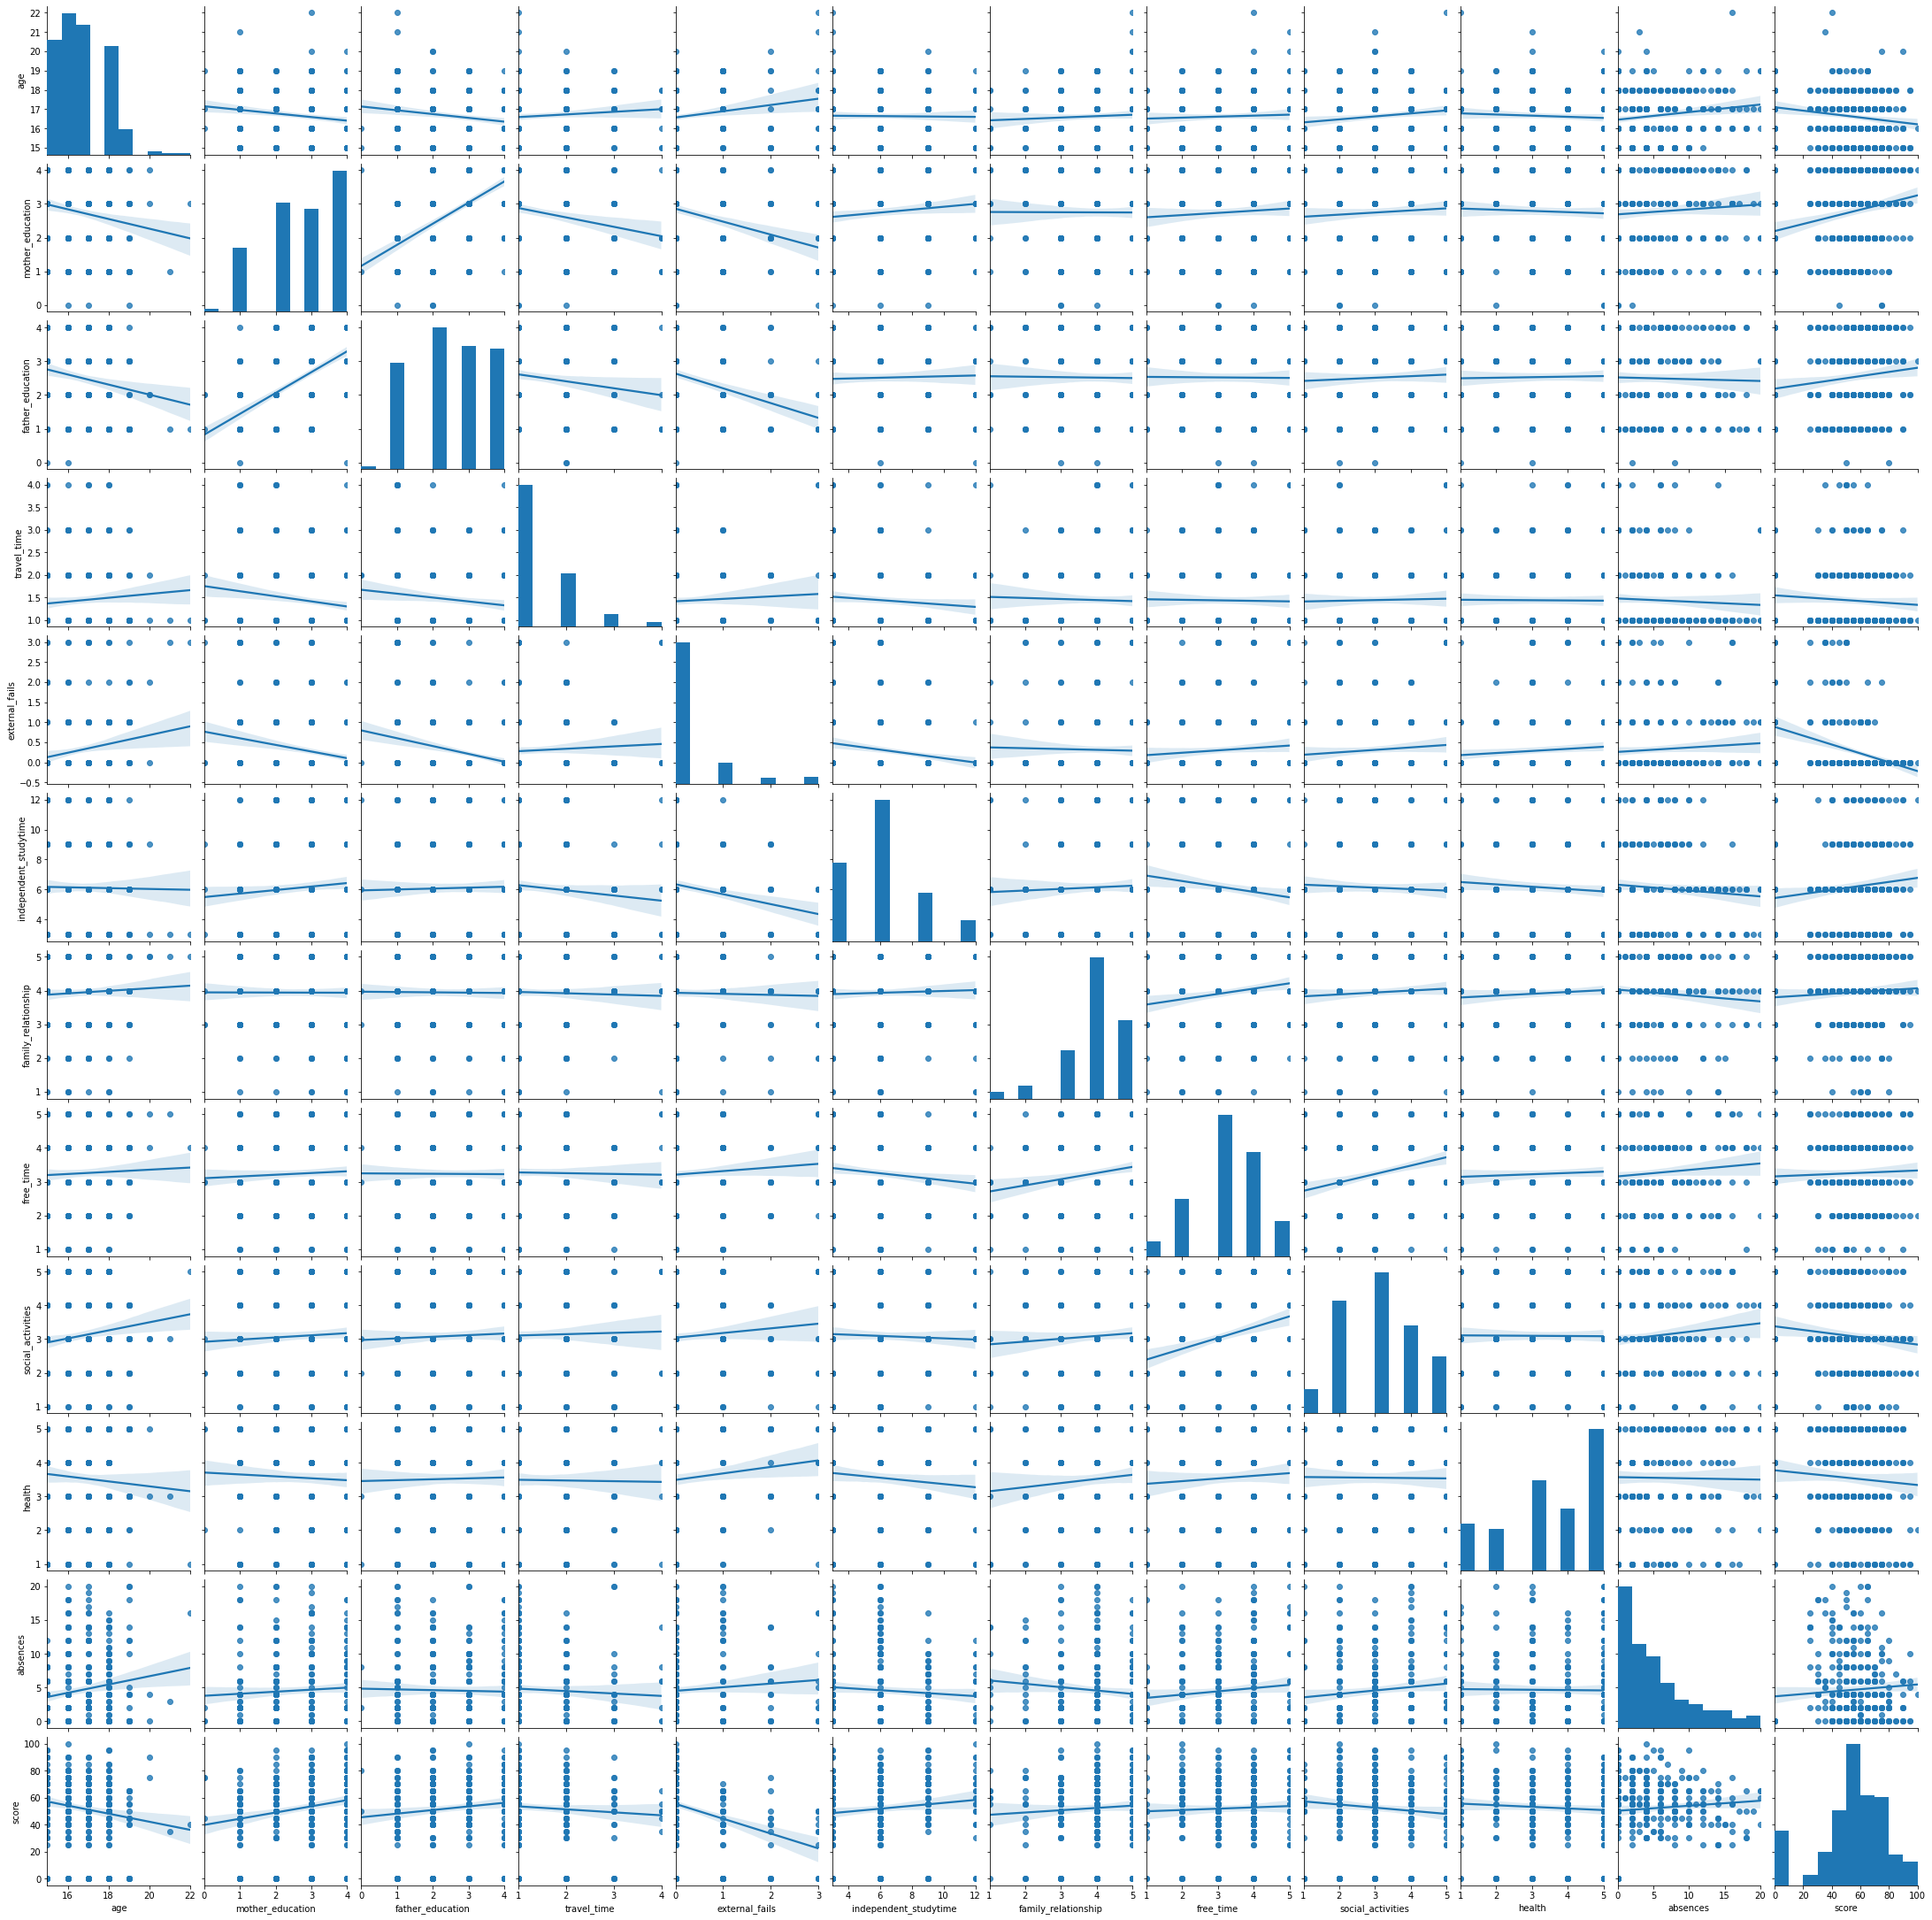

In [45]:
'''Display the data as a set of regression line graphs'''
sns.pairplot(student, kind = 'reg')

In [46]:
'''Numerical values of the correlation coefficients'''
student.corr()

,age,mother_education,father_education,travel_time,external_fails,independent_studytime,family_relationship,free_time,social_activities,health,absences,score
age,1.000000,-0.163778,-0.171069,0.076029,0.189051,-0.013423,0.052536,0.040425,0.135982,-0.066051,0.155469,-0.163081
mother_education,-0.163778,1.000000,0.621349,-0.177516,-0.251798,0.100130,-0.002946,0.057668,0.062856,-0.044920,0.066439,0.220590
father_education,-0.171069,0.621349,1.000000,-0.133031,-0.292324,0.026068,-0.011280,-0.006833,0.047386,0.020899,-0.024235,0.128802
travel_time,0.076029,-0.177516,-0.133031,1.000000,0.056862,-0.093095,-0.030108,-0.016429,0.024558,-0.010364,-0.050613,-0.068430
external_fails,0.189051,-0.251798,-0.292324,0.056862,1.000000,-0.188624,-0.024999,0.079868,0.091623,0.100116,0.076537,-0.348271
independent_studytime,-0.013423,0.100130,0.026068,-0.093095,-0.188624,1.000000,0.037556,-0.136326,-0.041912,-0.085419,-0.075454,0.120591
family_relationship,0.052536,-0.002946,-0.011280,-0.030108,-0.024999,0.037556,1.000000,0.169102,0.068584,0.081382,-0.092902,0.067254
free_time,0.040425,0.057668,-0.006833,-0.016429,0.079868,-0.136326,0.169102,1.000000,0.281938,0.055104,0.096281,0.041174
social_activities,0.135982,0.062856,0.047386,0.024558,0.091623,-0.041912,0.068584,0.281938,1.000000,-0.007983,0.113048,-0.111971
health,-0.066051,-0.044920,0.020899,-0.010364,0.100116,-0.085419,0.081382,0.055104,-0.007983,1.000000,-0.013156,-0.072172


In [47]:
#Correlation coefficients for the score
student.corr()['score'].sort_values()

external_fails          -0.348271
age                     -0.163081
social_activities       -0.111971
health                  -0.072172
travel_time             -0.068430
free_time                0.041174
family_relationship      0.067254
absences                 0.081274
independent_studytime    0.120591
father_education         0.128802
mother_education         0.220590
score                    1.000000
Name: score, dtype: float64

In [48]:
model_list = []
for index in student.corr()['score'].sort_values().index[:-1]:
    model_list.append(index)

In [49]:
def get_boxplot(column):
    '''The function draws a boxplot for a column
    using score as y value'''
    fig, ax = plt.subplots(figsize = (5, 10))
    sns.boxplot(x=column, y='score', 
                data=student.loc[student.loc[:, column].isin(student.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

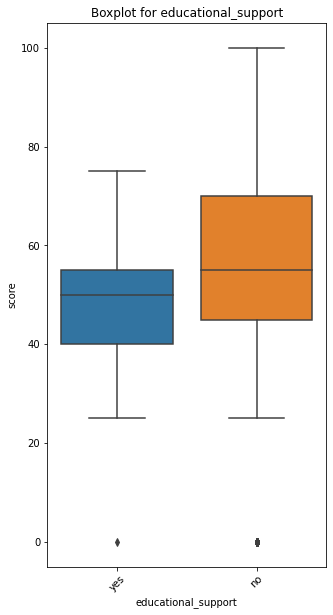

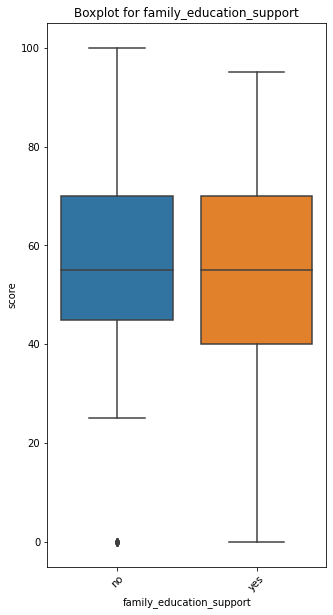

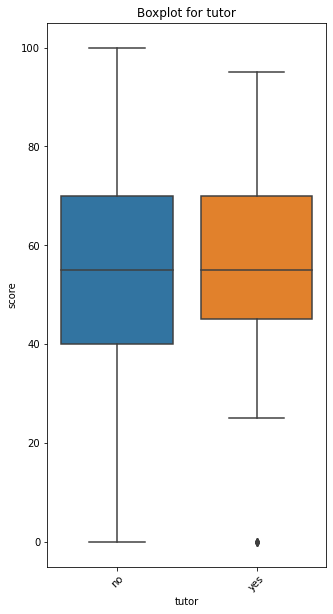

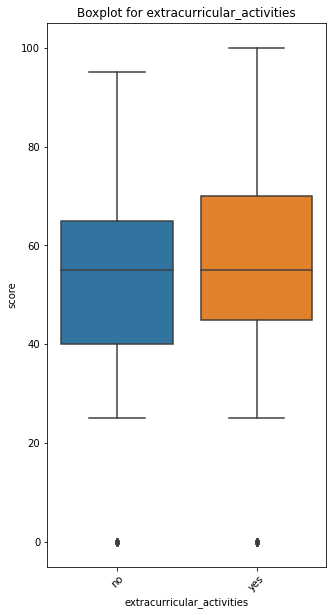

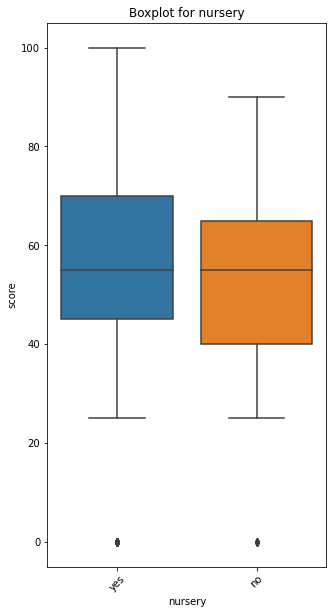

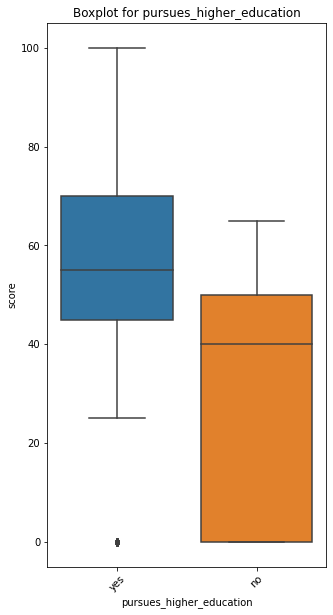

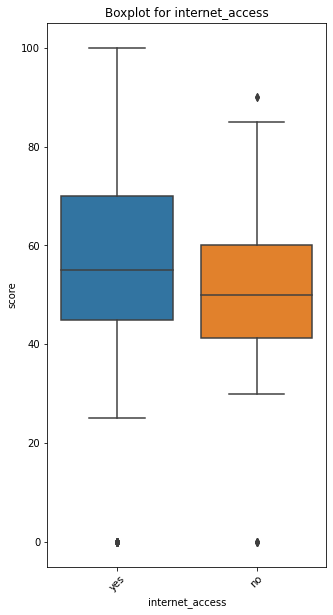

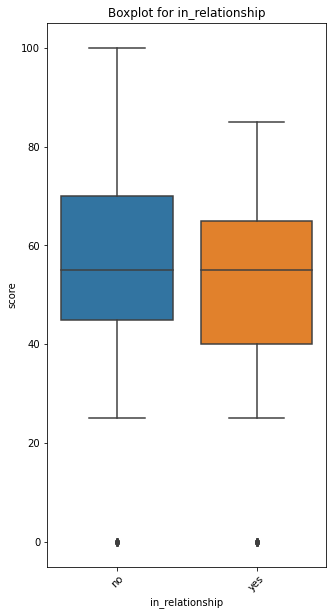

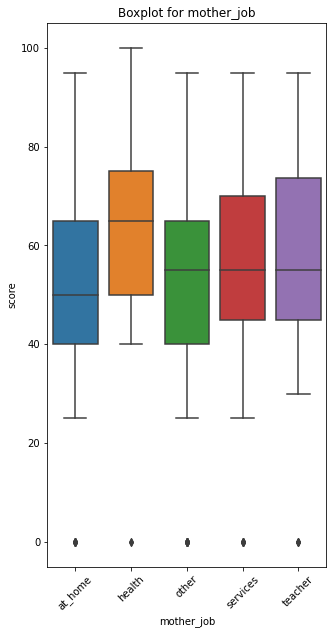

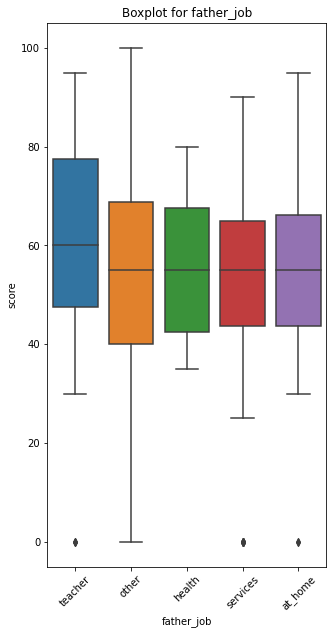

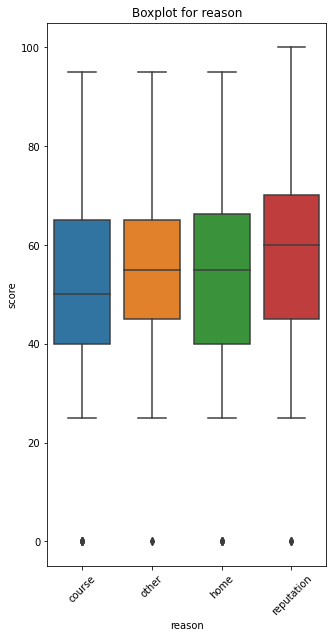

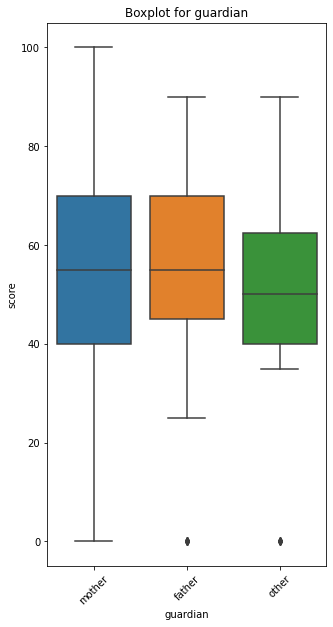

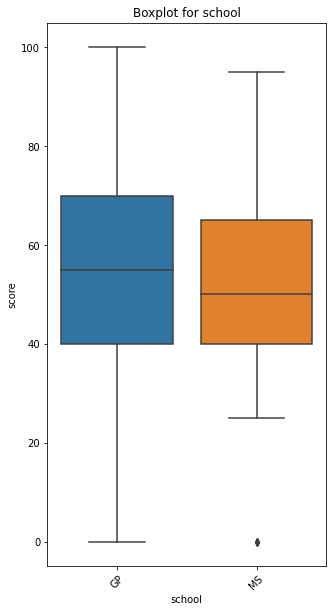

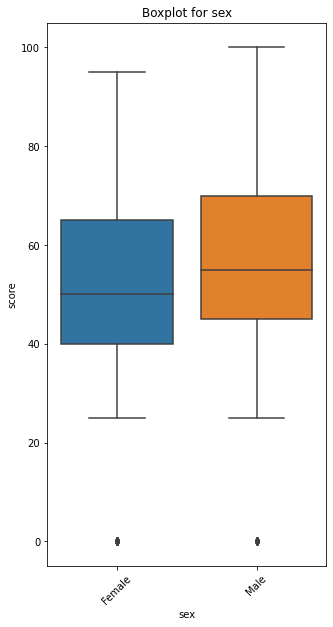

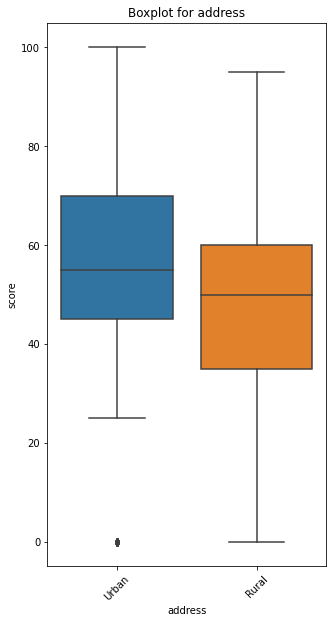

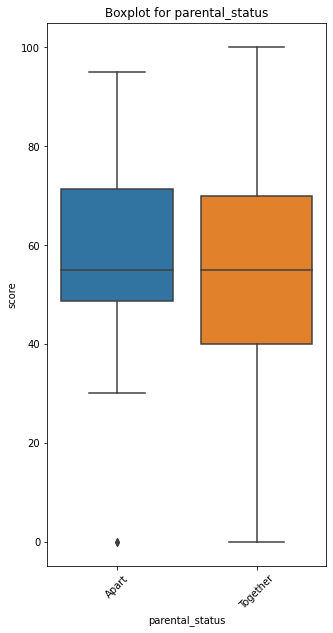

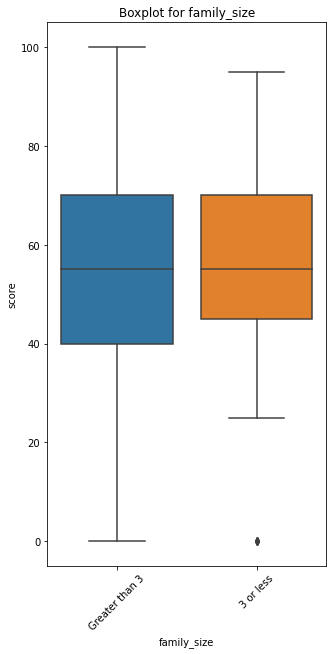

In [50]:
for column in ['educational_support', 'family_education_support',
               'tutor', 'extracurricular_activities', 'nursery',
               'pursues_higher_education', 'internet_access',
               'in_relationship', 'mother_job', 'father_job',
               'reason', 'guardian','school', 'sex', 'address',
              'parental_status', 'family_size']:
    get_boxplot(column)

In [51]:
def get_stat_dif(column):
    '''The function does a statistical T-test
    and, if null hypothesis is rejected, it
    shows in which column it was rejected and adds
    it to the list'''
    cols = student.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(student.loc[student.loc[:, column] == comb[0], 'score'], 
                        student.loc[student.loc[:, column] == comb[1], 'score']
                    ).pvalue \
            <= 0.05/len(combinations_all):
            print('There significant difference between mean values found in a column',column)
            model_list.append(column)
            break

In [52]:
for column in ['educational_support', 'family_education_support',
               'tutor', 'extracurricular_activities', 'nursery',
               'pursues_higher_education', 'internet_access',
               'in_relationship', 'mother_job', 'father_job',
               'reason', 'guardian','school', 'sex', 'address',
              'parental_status', 'family_size']:
    get_stat_dif(column)

There significant difference between mean values found in a column tutor
There significant difference between mean values found in a column pursues_higher_education
There significant difference between mean values found in a column in_relationship
There significant difference between mean values found in a column mother_job
There significant difference between mean values found in a column sex
There significant difference between mean values found in a column address


In [53]:
print(model_list)
student_model = student.loc[:, model_list]
student_model.head()

['external_fails', 'age', 'social_activities', 'health', 'travel_time', 'free_time', 'family_relationship', 'absences', 'independent_studytime', 'father_education', 'mother_education', 'tutor', 'pursues_higher_education', 'in_relationship', 'mother_job', 'sex', 'address']


,external_fails,age,social_activities,health,travel_time,free_time,family_relationship,absences,independent_studytime,father_education,mother_education,tutor,pursues_higher_education,in_relationship,mother_job,sex,address
0,0.0,18,4.0,3.0,2.0,3.0,4.0,6.0,6.0,4.0,4.0,no,yes,no,at_home,Female,Urban
1,0.0,17,3.0,3.0,1.0,3.0,5.0,4.0,6.0,1.0,1.0,no,yes,no,at_home,Female,Urban
2,3.0,15,2.0,3.0,1.0,3.0,4.0,10.0,6.0,1.0,1.0,NaN,yes,NaN,at_home,Female,Urban
3,0.0,15,2.0,5.0,1.0,2.0,3.0,2.0,9.0,2.0,4.0,yes,yes,yes,health,Female,Urban
4,0.0,16,2.0,5.0,1.0,3.0,4.0,4.0,6.0,3.0,3.0,yes,yes,no,other,Female,Urban
